# Import bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import copy as cp

# Inicializar parametros
##### w --> pesos (w1, w2, b)
##### training_data --> [[x1, x2, contante_1], saida]
##### learning_rate = 0.1
##### max_it = 10
##### erros = []

In [2]:
w = np.array([0.3092, 0.3092, -0.8649])
#w = np.random.rand(3)
learning_rate = 0.1
max_it = 10
erros = []
training_data = [ (np.array([0,0,1]), 0), 
                  (np.array([0,1,1]), 1), 
                  (np.array([1,0,1]), 1), 
                  (np.array([1,1,1]), 1), ]
print ('w: ', w)
print ('learning_rate: ', learning_rate)
print ('max_it: ', max_it)
print ('erros: ', erros)
print ('training_data: ', training_data)

w:  [ 0.3092  0.3092 -0.8649]
learning_rate:  0.1
max_it:  10
erros:  []
training_data:  [(array([0, 0, 1]), 0), (array([0, 1, 1]), 1), (array([1, 0, 1]), 1), (array([1, 1, 1]), 1)]


# Separar dados de treinamento e resultado esperado

In [3]:
#x, resultado_esperado = choice(training_data) 
x=[]
resultado_esperado=[]
for i in range(len(training_data)):
    x_temp, resultado_esperado_temp = training_data[i]
    x.append(x_temp)
    resultado_esperado.append(resultado_esperado_temp)
    
print ('x: ', x)
print ('resultado_esperado: ', resultado_esperado)

x:  [array([0, 0, 1]), array([0, 1, 1]), array([1, 0, 1]), array([1, 1, 1])]
resultado_esperado:  [0, 1, 1, 1]


# Função predição

In [4]:
def predicao(x, w):
    fx_temp = np.dot(x, w) 
    pred_temp = np.where(fx_temp > 0.5, 1, 0)
    return fx_temp, pred_temp

In [5]:
fx_temp, pred_temp = predicao(x, w)
print (fx_temp, pred_temp, resultado_esperado)

[-0.8649 -0.5557 -0.5557 -0.2465] [0 0 0 0] [0, 1, 1, 1]


# Função grafico(w_calc) 
Função de plota gráfico de linha de decisão

In [6]:
def grafico(w, titulo, x, resultado_esperado):
    plt.title(titulo)
    X = np.copy(x)
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    aa = np.c_[xx.ravel(), yy.ravel()]
    ones = np.ones((aa.shape[0],1))
    aa = np.append(aa, ones, axis=1)
    fx_graf, pred_graf = predicao(aa, w)
    Z = pred_graf.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    for i in range(len(x)):
        if resultado_esperado[i] == 0:
            plt.scatter(x[i][0], x[i][1],  c='darkred')
        else:
            plt.scatter(x[i][0], x[i][1], c='darkblue')
    plt.show()

# Função para cálculo do Adaline
#### adaline(w, max_it, learning_rate, x, resultado_esperado)
#### retorna w

In [7]:
def adaline(w, max_it, learning_rate, x, resultado_esperado, verbose=False):
    epoca = 0
    erros_epocas= []
    erro_epoca = 1.0
    
    while (epoca < max_it and erro_epoca != 0.0):
        w_anterior = cp.copy(w)
        erro_epoca = 0.0
        for i in range(len(x)):
            fx, pred = predicao(x, w)   #fx = np.dot(x,w)    #pred = np.where(fx > 0, 1, 0)
            erro_amostra = resultado_esperado[i] - fx[i] #erro_epoca += abs(resultado_esperado[i] - pred[i])
            w += learning_rate * erro_amostra * x[i]
            erro_epoca += abs(erro_amostra)
        erros_epocas.append(erro_epoca)
        if (verbose):
            titulo = 'Epoca: '+ str(epoca) +', erro: ' + str(erro_epoca)
            print (titulo)
            print ('w: ', w_anterior)
            grafico(w_anterior, titulo, x, resultado_esperado)
        epoca += 1
    return w, erros_epocas, epoca

# Executar função Adaline

Epoca: 0, erro: 4.2581092
w:  [ 0.3092  0.3092 -0.8649]


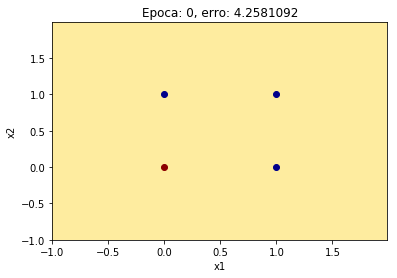

Epoca: 1, erro: 2.16404098304
w:  [ 0.50159992  0.51629202 -0.43908908]


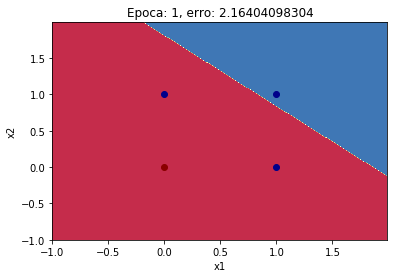

Epoca: 2, erro: 1.59331937626
w:  [ 0.5862063   0.60821807 -0.22268498]


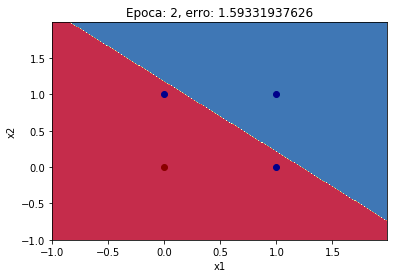

Epoca: 3, erro: 1.33702712944
w:  [ 0.61936077  0.64509335 -0.10804217]


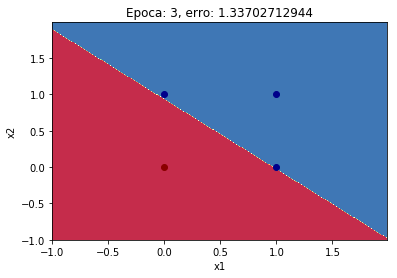

Epoca: 4, erro: 1.1947995033
w:  [ 0.62820928  0.65589004 -0.04317498]


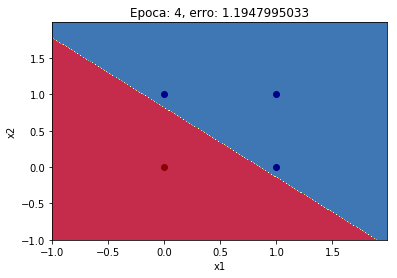

Epoca: 5, erro: 1.10883437616
w:  [ 0.62581386  0.65455623 -0.00295616]


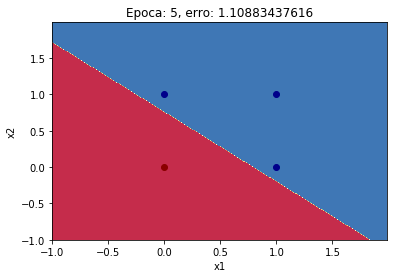

Epoca: 6, erro: 1.10072130263
w:  [ 0.61844372  0.64779289  0.02477975]


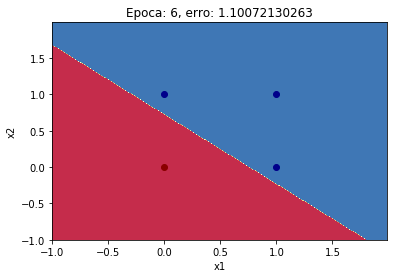

Epoca: 7, erro: 1.10009382041
w:  [ 0.60909289  0.6388062   0.04594148]


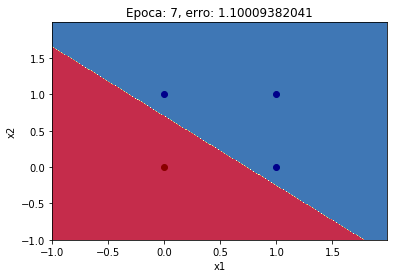

Epoca: 8, erro: 1.10019581653
w:  [ 0.59917733  0.62911777  0.06341642]


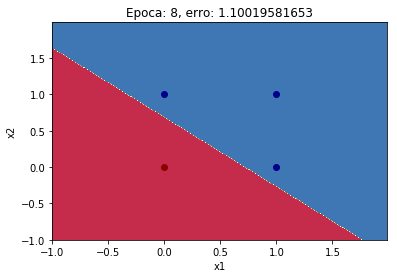

Epoca: 9, erro: 1.10062221692
w:  [ 0.58935357  0.61943804  0.07863176]


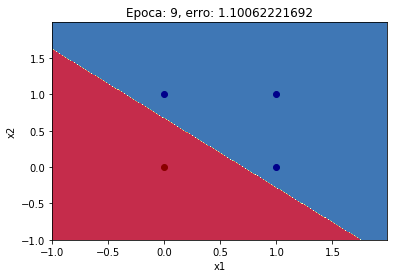

w_calc:  [ 0.57991356  0.61008752  0.09230791]
erro na ultima epoca 10 :  1.10062221692
[ 0.09230791  0.70239543  0.67222147  1.28230899]
[0 1 1 1]
ponto:  [0 0] :  0.0923079139954  ->  0
ponto:  [0 1] :  0.702395433315  ->  1
ponto:  [1 0] :  0.672221474951  ->  1
ponto:  [1 1] :  1.28230899427  ->  1


In [8]:
w = np.array([0.3092, 0.3092, -0.8649])
#w = np.random.rand(3)
learning_rate = 0.1
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, True)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Avaliar resultado final para todos os pontos

In [9]:
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)

[ 0.09230791  0.70239543  0.67222147  1.28230899]
[0 1 1 1]


In [10]:
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

ponto:  [0 0] :  0.0923079139954  ->  0
ponto:  [0 1] :  0.702395433315  ->  1
ponto:  [1 0] :  0.672221474951  ->  1
ponto:  [1 1] :  1.28230899427  ->  1


# Somatorio de erros a cada epoca

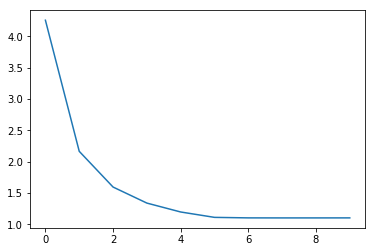

In [11]:
plt.plot(erros_calc)
plt.show()

In [12]:
taxa_aprendizagens = np.arange(0.1, 1.0, 0.1)
taxa_aprendizagens

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

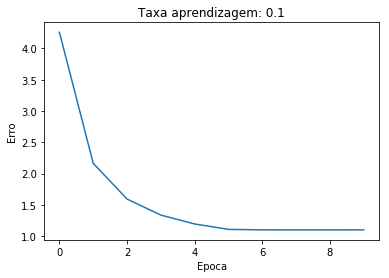

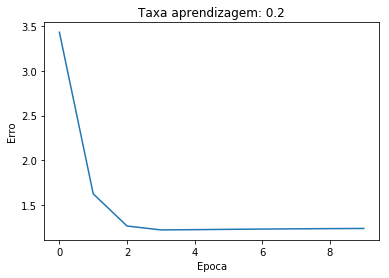

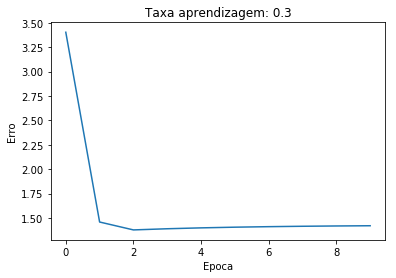

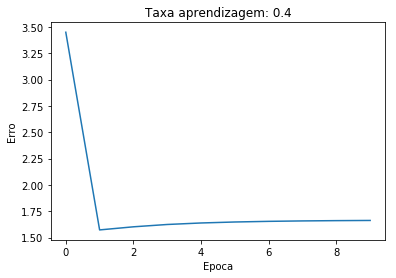

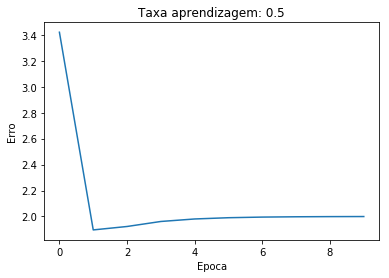

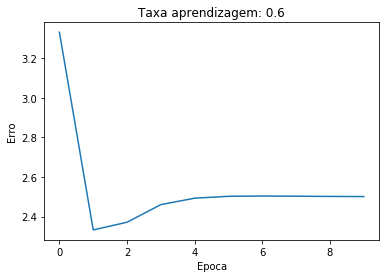

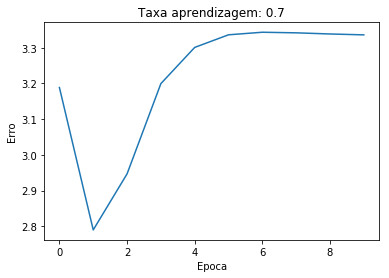

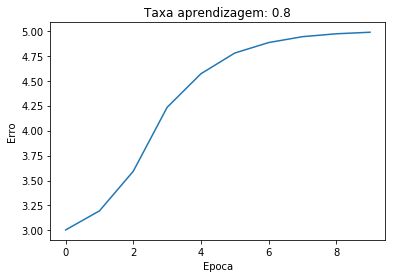

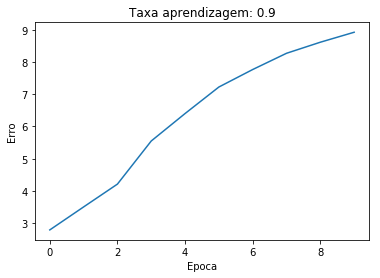

In [13]:
for i in taxa_aprendizagens:
    w = np.array([0.3092, 0.3092, -0.8649])
    w_calc, erros_calc, j = adaline(w, max_it, i, x, resultado_esperado, False)
    plt.title("Taxa aprendizagem: " + str(i))
    plt.ylabel("Erro")
    plt.xlabel("Epoca")
    plt.plot(erros_calc)
    plt.show()

# Verificar comportamento da função Adaline com:
# todos os pesos = 0
Considerando learning_rate = 0.1 e max_it = 100000
#### o algoritmo convergiu!!!

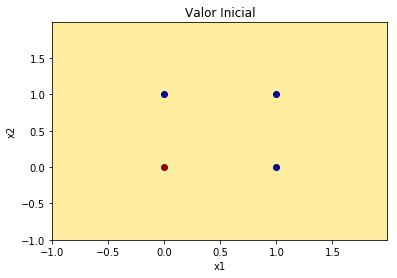

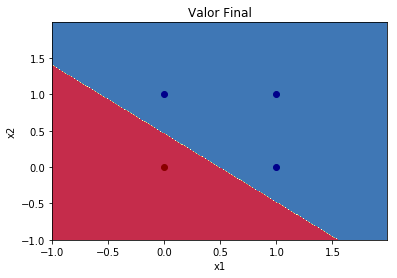

w_calc:  [ 0.44426104  0.47202838  0.27803239]
erro na ultima epoca 100 :  1.11112555537
[ 0.27803239  0.75006077  0.72229343  1.1943218 ]
[0 1 1 1]
ponto:  [0 0] :  0.278032389456  ->  0
ponto:  [0 1] :  0.750060765516  ->  1
ponto:  [1 0] :  0.722293426396  ->  1
ponto:  [1 1] :  1.19432180246  ->  1


In [14]:
w = np.array([0.0, 0.0, 0.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 10 (positivos)
Considerando learning_rate = 0.1 e max_it = 100000
#### o algoritmo convergiu!

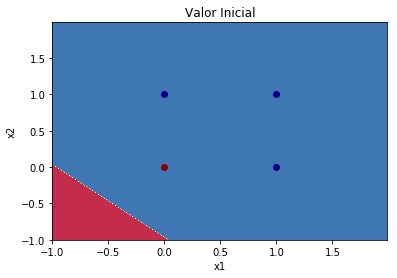

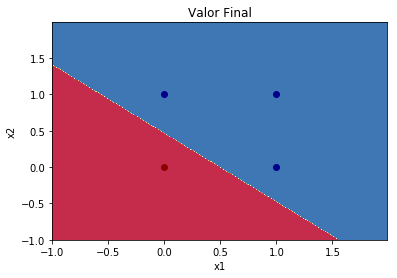

w_calc:  [ 0.44700048  0.47491417  0.27423573]
erro na ultima epoca 100 :  1.11090957639
[ 0.27423573  0.7491499   0.72123622  1.19615038]
[0 1 1 1]
ponto:  [0 0] :  0.27423573356  ->  0
ponto:  [0 1] :  0.749149901249  ->  1
ponto:  [1 0] :  0.721236216059  ->  1
ponto:  [1 1] :  1.19615038375  ->  1


In [15]:
w = np.array([10.0, 10.0, 10.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = -10 (negativos)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!

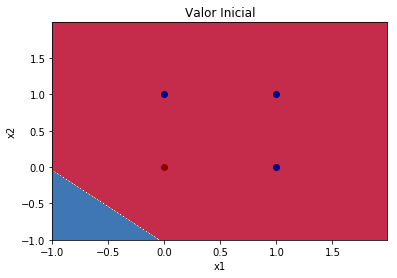

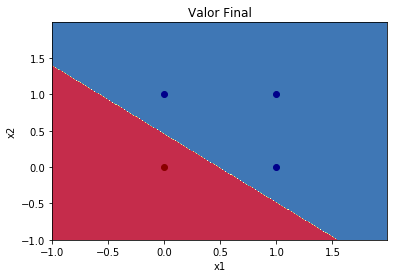

w_calc:  [ 0.44152159  0.46914258  0.28182905]
erro na ultima epoca 100 :  1.11134153435
[ 0.28182905  0.75097163  0.72335064  1.19249322]
[0 1 1 1]
ponto:  [0 0] :  0.281829045353  ->  0
ponto:  [0 1] :  0.750971629783  ->  1
ponto:  [1 0] :  0.723350636732  ->  1
ponto:  [1 1] :  1.19249322116  ->  1


In [16]:
w = np.array([-10.0, -10.0, -10.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 10 (positivos) e bias = -10 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

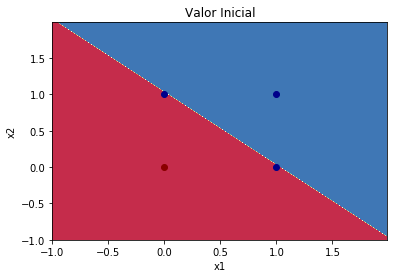

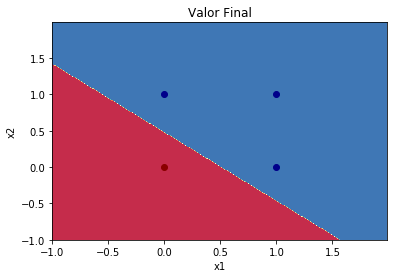

w_calc:  [ 0.45346245  0.48174489  0.2652644 ]
erro na ultima epoca 100 :  1.11040068769
[ 0.2652644   0.74700929  0.71872685  1.20047174]
[0 1 1 1]
ponto:  [0 0] :  0.265264399331  ->  0
ponto:  [0 1] :  0.747009287759  ->  1
ponto:  [1 0] :  0.718726850375  ->  1
ponto:  [1 1] :  1.2004717388  ->  1


In [17]:
w = np.array([10.0, 10.0, -10.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 1 (positivos) e bias = 1 (positivo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

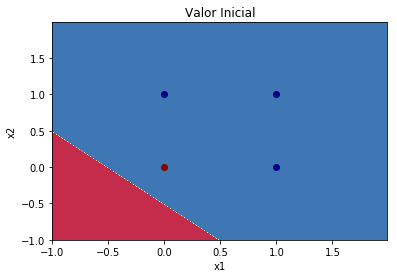

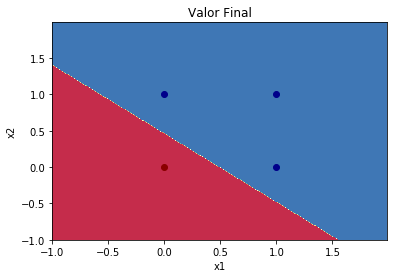

w_calc:  [ 0.44453498  0.47231696  0.27765272]
erro na ultima epoca 100 :  1.11110395747
[ 0.27765272  0.74996968  0.72218771  1.19450466]
[0 1 1 1]
ponto:  [0 0] :  0.277652723866  ->  0
ponto:  [0 1] :  0.749969679089  ->  1
ponto:  [1 0] :  0.722187705362  ->  1
ponto:  [1 1] :  1.19450466058  ->  1


In [18]:
w = np.array([1.0, 1.0, 1.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 1 (positivos) e bias = -1 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

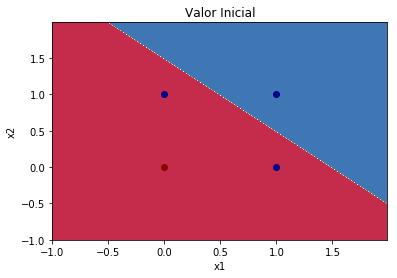

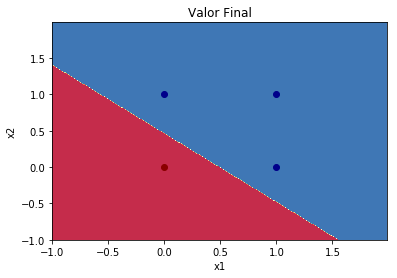

w_calc:  [ 0.44518118  0.47300003  0.27675559]
erro na ultima epoca 100 :  1.1110530686
[ 0.27675559  0.74975562  0.72193677  1.1949368 ]
[0 1 1 1]
ponto:  [0 0] :  0.276755590444  ->  0
ponto:  [0 1] :  0.74975561774  ->  1
ponto:  [1 0] :  0.721936768794  ->  1
ponto:  [1 1] :  1.19493679609  ->  1


In [19]:
w = np.array([1.0, 1.0, -1.0])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 0.123 (positivos) e bias = -0.321 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!

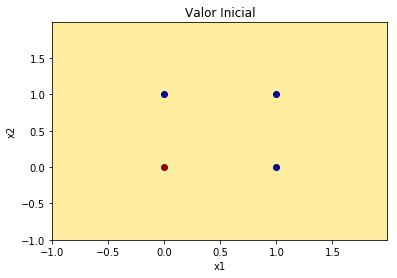

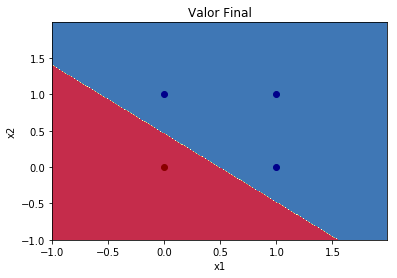

w_calc:  [ 0.44443819  0.47221551  0.27778653]
erro na ultima epoca 100 :  1.1111116015
[ 0.27778653  0.75000204  0.72222471  1.19444023]
[0 1 1 1]
ponto:  [0 0] :  0.277786526969  ->  0
ponto:  [0 1] :  0.750002040266  ->  1
ponto:  [1 0] :  0.72222471479  ->  1
ponto:  [1 1] :  1.19444022809  ->  1


In [20]:
w = np.array([0.123, 0.123, -0.321])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 0.123 e 0.234 (positivos) e bias = -0.321 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!

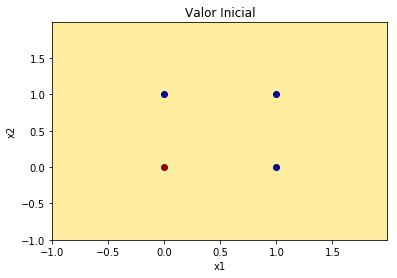

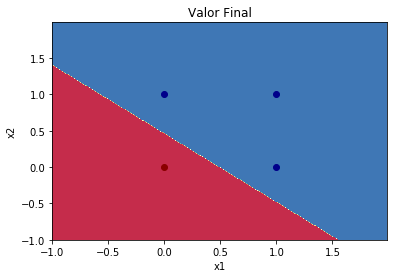

w_calc:  [ 0.44446938  0.47225014  0.27774213]
erro na ultima epoca 100 :  1.1111091861
[ 0.27774213  0.74999227  0.72221151  1.19446165]
[0 1 1 1]
ponto:  [0 0] :  0.277742130219  ->  0
ponto:  [0 1] :  0.749992273187  ->  1
ponto:  [1 0] :  0.722211505346  ->  1
ponto:  [1 1] :  1.19446164831  ->  1


In [21]:
w = np.array([0.123, 0.234, -0.321])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 0.123 e 0.987 (positivos) e bias = -0.321 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

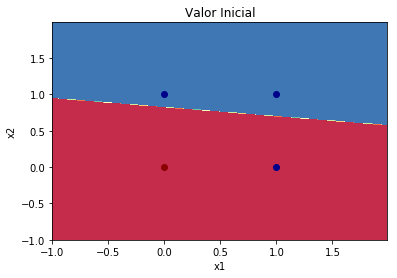

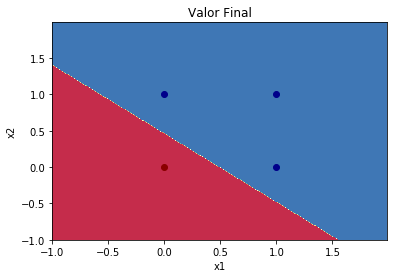

w_calc:  [ 0.44468094  0.47248506  0.27744095]
erro na ultima epoca 100 :  1.11109280055
[ 0.27744095  0.74992602  0.7221219   1.19460696]
[0 1 1 1]
ponto:  [0 0] :  0.277440952268  ->  0
ponto:  [0 1] :  0.749926015436  ->  1
ponto:  [1 0] :  0.722121895335  ->  1
ponto:  [1 1] :  1.1946069585  ->  1


In [22]:
w = np.array([0.123, 0.987, -0.321])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Adaline com:
# todos os pesos = 0.987 e 0.123 (positivos) e bias = -0.5 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

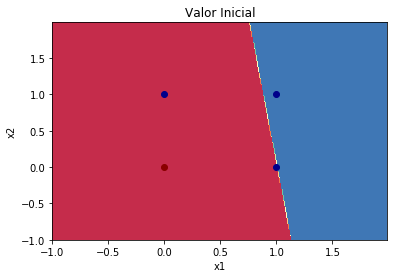

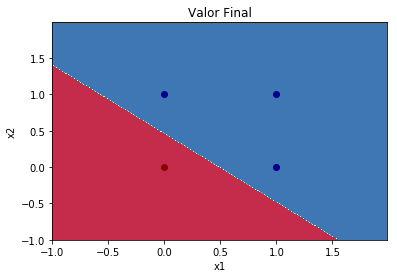

w_calc:  [ 0.44476911  0.47255152  0.27733622]
erro na ultima epoca 100 :  1.11108520332
[ 0.27733622  0.74988773  0.72210533  1.19465685]
[0 1 1 1]
ponto:  [0 0] :  0.27733621552  ->  0
ponto:  [0 1] :  0.74988773343  ->  1
ponto:  [1 0] :  0.722105327852  ->  1
ponto:  [1 1] :  1.19465684576  ->  1


In [23]:
w = np.array([0.987, 0.123, -0.5])
learning_rate = 0.1
max_it = 100
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = adaline(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])